# Timeseries of Porto Alegre cases

Breakdown of cases from PortoAlegre, along with imported cases that we know of, over time.

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sys

In [2]:
sys.path.append('..')

## Timeseries plots

In [3]:
file_pa = '../Data/431490/431490_total.csv'
df_pa = pd.read_csv(file_pa,delimiter = ';', parse_dates = ['FIRST_DAY'])

In [4]:
df_pa.drop(columns = 'Unnamed: 0')

,SIN_YEAR,SIN_WEEK,FIRST_DAY,CASES,IMPORTED
0,2007,1,2007-01-07,0,0
1,2007,2,2007-01-14,1,1
2,2007,3,2007-01-21,0,0
3,2007,4,2007-01-28,0,0
4,2007,5,2007-02-04,1,1
...,...,...,...,...,...
776,2021,48,2021-11-28,0,0
777,2021,49,2021-12-05,0,0
778,2021,50,2021-12-12,1,1
779,2021,51,2021-12-19,0,0


In [5]:
start_date = str(min(df_pa['FIRST_DAY']).year) + '-01-01'
end_date = str(max(df_pa['FIRST_DAY']).year + 1) + '-12-31'

xticks_major = pd.date_range(start = start_date, end = end_date, freq = 'YS')
xticks_labels = xticks_major.year

### Timeseries plots of total cases

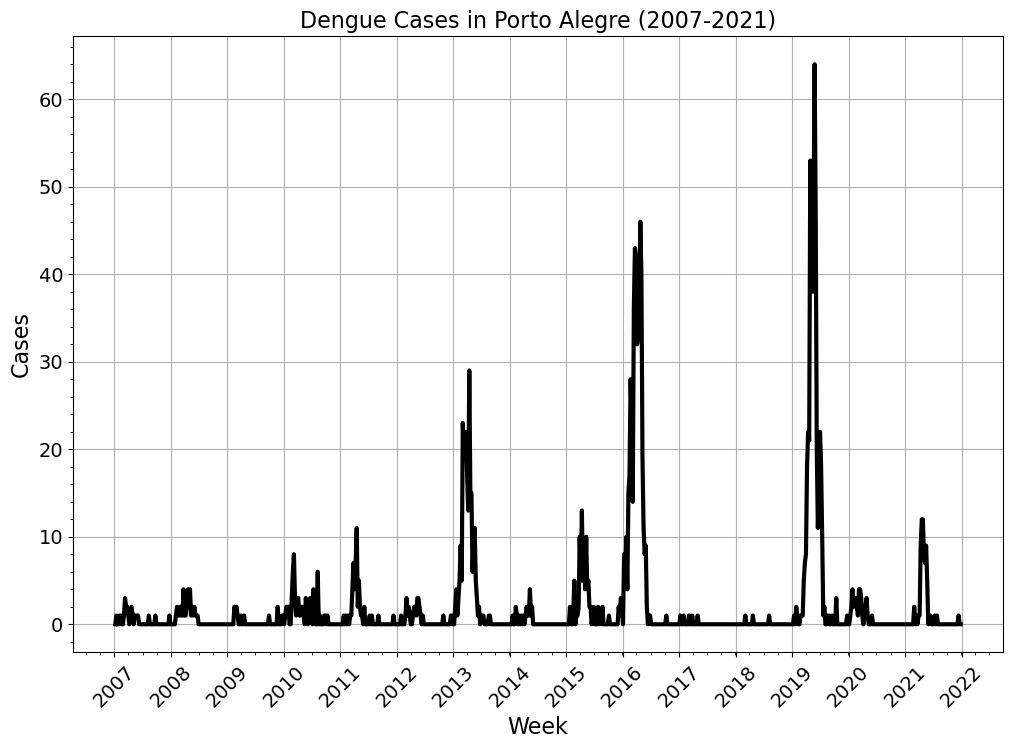

In [6]:
fig = plt.figure(figsize = (12,8))
plt.plot(df_pa['FIRST_DAY'],df_pa['CASES'], linewidth = 3, color = 'k')
plt.xlabel('Week',fontsize = 16)
plt.ylabel('Cases',fontsize = 16)
plt.xticks(xticks_major, labels = xticks_labels, fontsize = 14, rotation = 45)
plt.yticks(fontsize = 14)
plt.minorticks_on()
plt.grid()
plt.title('Dengue Cases in Porto Alegre (2007-2021)', fontsize = 16)
plt.show()

### Timeseries plots of total cases with imported ones 

- It is very interesting that some years there are more imported cases but they do not generate an autoctonous outbreak in Porto Alegre
- Other years, there are way less and there is indeed an outbreak of autoctonous cases
- In those cases, which are limited, there seems to be a lag between the peak of imported and the peak of autoctonous ones.This is interesting, and it could be because of two reasons that I think of:
    - Indeed, more imported cases arrive before the outbreak, because of the places they come from (**now that i think, either people from Porto Alegre travelling to other places, or tourists arriving, maybe this could be distinguished the data? since there are residency and place of probable infection, so tourists have different residency, whereas locals have a place of probable infection different from their own residency**)
    - More cases are classified as autoctonous above a certain threshold of total cases detected in the region. That is, it is more likely for a case to be autoctonous if there are a lot of cases around.

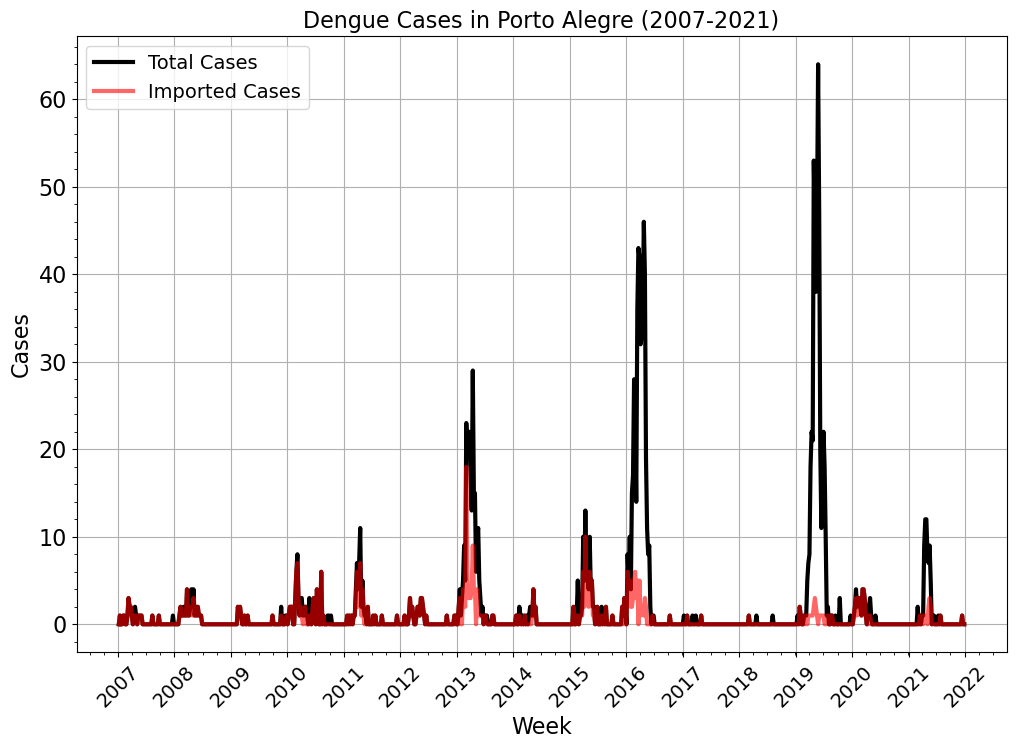

In [7]:
fig = plt.figure(figsize = (12,8))
plt.plot(df_pa['FIRST_DAY'],df_pa['CASES'], linewidth = 3, color = 'k', label = 'Total Cases')
plt.plot(df_pa['FIRST_DAY'],df_pa['IMPORTED'], linewidth = 3, color = 'r', alpha = 0.6, label = 'Imported Cases')
plt.xlabel('Week',fontsize = 16)
plt.ylabel('Cases',fontsize = 16)
plt.xticks(xticks_major, labels = xticks_labels, fontsize = 14, rotation = 45)
plt.yticks(fontsize = 16)
plt.minorticks_on()
plt.grid()
plt.legend(fontsize = 14)
plt.title('Dengue Cases in Porto Alegre (2007-2021)', fontsize = 16)
plt.show()

### Timeseries of cases - imported

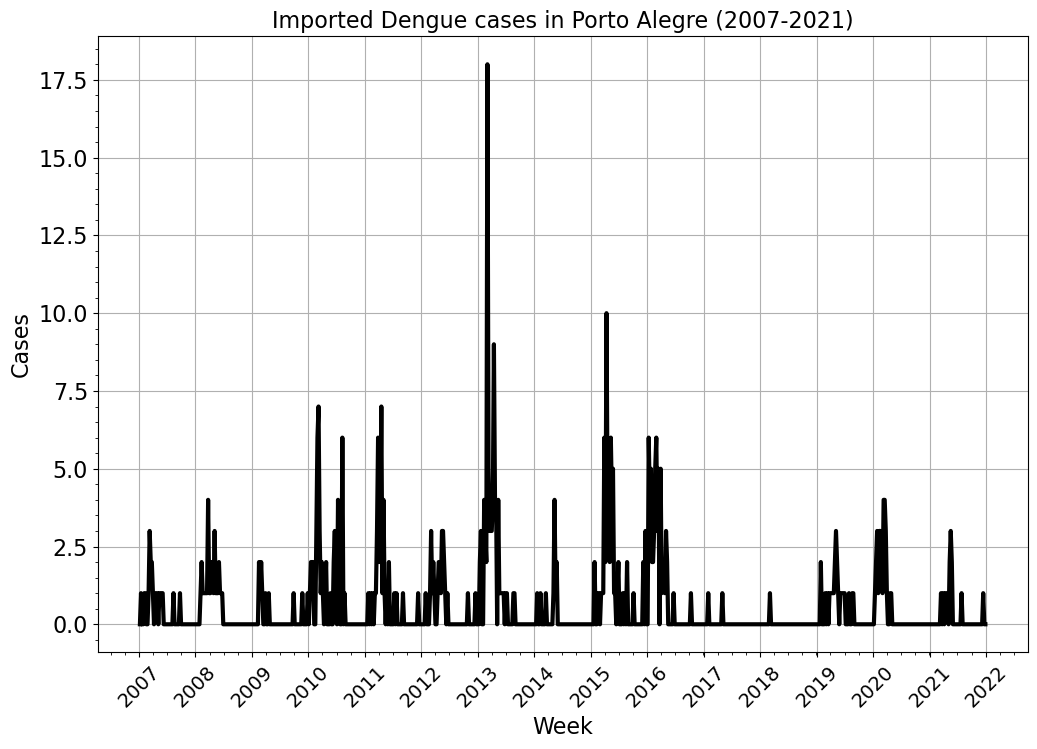

In [9]:
fig = plt.figure(figsize = (12,8))
plt.plot(df_pa['FIRST_DAY'],df_pa['IMPORTED'], linewidth = 3, color = 'k')
#plt.plot(df_pa['FIRST_DAY'],df_pa['CASES'], linewidth = 3, color = 'r', label = 'Cases')
plt.xlabel('Week',fontsize = 16)
plt.ylabel('Cases',fontsize = 16)
plt.xticks(xticks_major, labels = xticks_labels, fontsize = 14, rotation = 45)
plt.yticks(fontsize = 16)
plt.minorticks_on()
plt.grid()
plt.title('Imported Dengue cases in Porto Alegre (2007-2021)', fontsize = 16)
plt.show()

## Temperature and Cases

### Cases and temperatures

In [34]:
pa_climate = pd.read_csv('../Data/431490/A801_climate.txt', sep=",",quotechar='"',
                   parse_dates=["data"],na_values=[''])

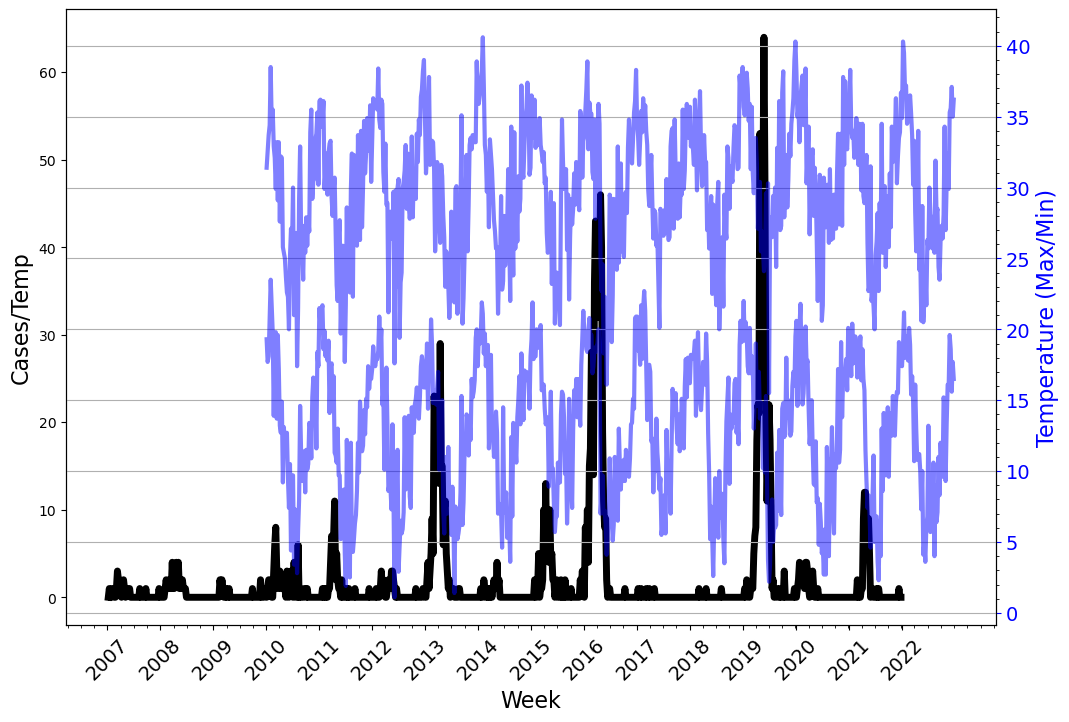

In [37]:
fig, ax1 = plt.subplots(figsize = (12,8))
ax1.plot(df_pa['FIRST_DAY'],df_pa['CASES'], linewidth = 5, color = 'k', label = 'Cases')
ax1.set_xlabel('Week',fontsize = 16)
ax1.set_ylabel('Cases',fontsize = 16)
ax1.set_xticks(xticks_major, labels = xticks_labels, fontsize = 14, rotation = 45)
ax2 = ax1.twinx() 
ax2.plot(pa_climate['data'],pa_climate['temperatura_minima_na_hora_ant'], color = 'blue', linewidth = 3, alpha = 0.5)
ax2.plot(pa_climate['data'],pa_climate['temperatura_maxima_na_hora_ant'], color = 'blue', linewidth = 3, alpha = 0.5)
ax2.set_ylabel('Temperature (Max/Min)', fontsize = 16, color = 'blue')
ax2.tick_params(labelsize = 14, colors = 'blue')
ax2.set_xticks(xticks_major)
ax2.set_xticklabels(labels = xticks_labels, fontsize=16)
ax2.minorticks_on()
plt.grid()
plt.show()

### Cases and temperatures - mean

In [38]:
pa_climate['temperatura_minima_na_hora_ant'].mean()

12.947787610619466

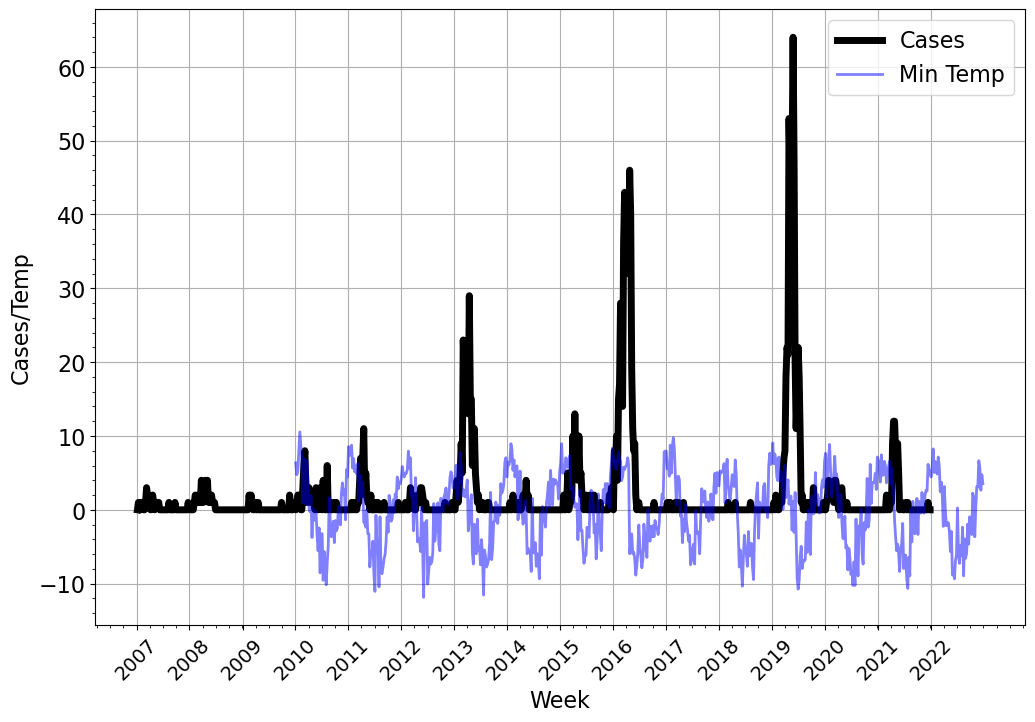

In [40]:
fig = plt.figure(figsize=(12,8))
plt.plot(df_pa['FIRST_DAY'],df_pa['CASES'], linewidth = 5, color = 'k', label = 'Cases')
plt.xlabel('Week',fontsize = 16)
plt.ylabel('Cases/Temp',fontsize = 16)
plt.xticks(xticks_major, labels = xticks_labels, fontsize = 14, rotation = 45)
plt.yticks(fontsize = 16)
plt.minorticks_on()
plt.grid()
plt.plot(pa_climate['data'],pa_climate['temperatura_minima_na_hora_ant'] - pa_climate['temperatura_minima_na_hora_ant'].mean(), color = 'blue', linewidth = 2, alpha = 0.5, label = 'Min Temp')
plt.legend(fontsize = 16)
plt.show()
#plt.plot(pa_climate['data'],pa_climate['temperatura_maxima_na_hora_ant'] - pa_climate['temperatura_maxima_na_hora_ant'].mean(), color = 'blue', linewidth = 2, alpha = 0.5)

In [39]:
pa_climate['temperatura_maxima_na_hora_ant'].mean()

30.03746312684366

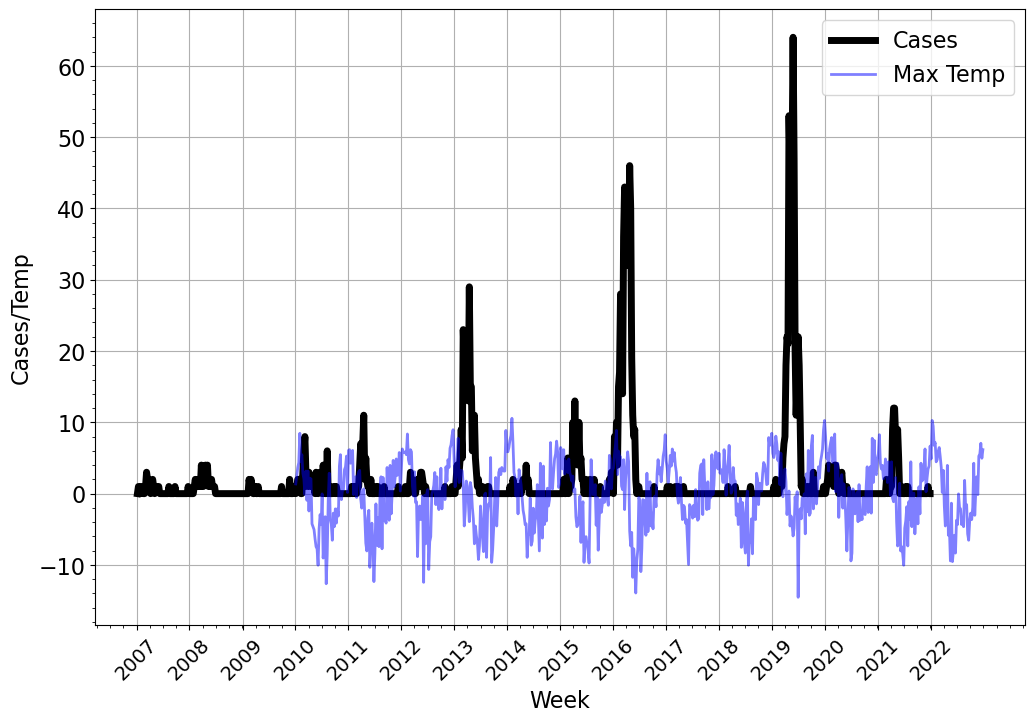

In [33]:
fig = plt.figure(figsize=(12,8))
plt.plot(df_pa['FIRST_DAY'],df_pa['CASES'], linewidth = 5, color = 'k', label = 'Cases')
plt.xlabel('Week',fontsize = 16)
plt.ylabel('Cases/Temp',fontsize = 16)
plt.xticks(xticks_major, labels = xticks_labels, fontsize = 14, rotation = 45)
plt.yticks(fontsize = 16)
plt.minorticks_on()
plt.grid()
plt.plot(pa_climate['data'],pa_climate['temperatura_maxima_na_hora_ant'] - pa_climate['temperatura_maxima_na_hora_ant'].mean(), color = 'blue', linewidth = 2, alpha = 0.5, label = 'Max Temp')
plt.legend(fontsize = 16)
plt.show()

## Precipitation and Cases

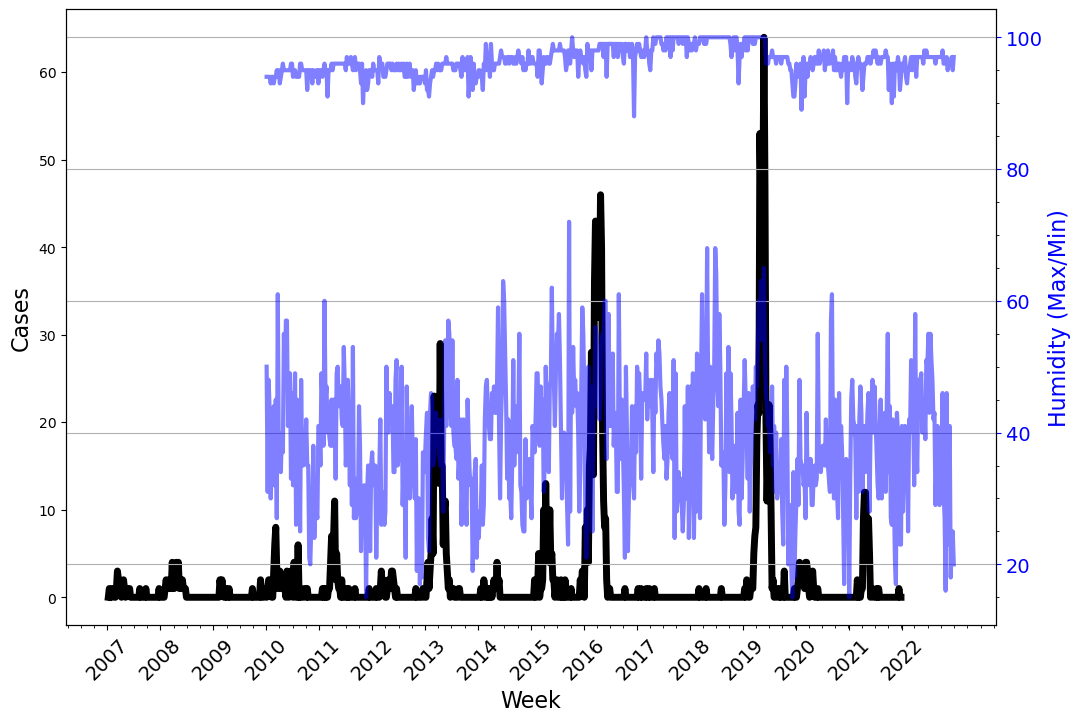

In [41]:
fig, ax1 = plt.subplots(figsize = (12,8))
ax1.plot(df_pa['FIRST_DAY'],df_pa['CASES'], linewidth = 5, color = 'k', label = 'Cases')
ax1.set_xlabel('Week',fontsize = 16)
ax1.set_ylabel('Cases',fontsize = 16)
ax1.set_xticks(xticks_major, labels = xticks_labels, fontsize = 14, rotation = 45)
ax2 = ax1.twinx() 
ax2.plot(pa_climate['data'],pa_climate['umidade_rel_min_na_hora_ant'], color = 'blue', linewidth = 3, alpha = 0.5)
ax2.plot(pa_climate['data'],pa_climate['umidade_rel_max_na_hora_ant'], color = 'blue', linewidth = 3, alpha = 0.5)
ax2.set_ylabel('Humidity (Max/Min)', fontsize = 16, color = 'blue')
ax2.tick_params(labelsize = 14, colors = 'blue')
ax2.set_xticks(xticks_major)
ax2.set_xticklabels(labels = xticks_labels, fontsize=16)
ax2.minorticks_on()
plt.grid()
plt.show()

### Cases and humidity - mean

In [42]:
pa_climate['umidade_rel_min_na_hora_ant'].mean()

38.99410029498525

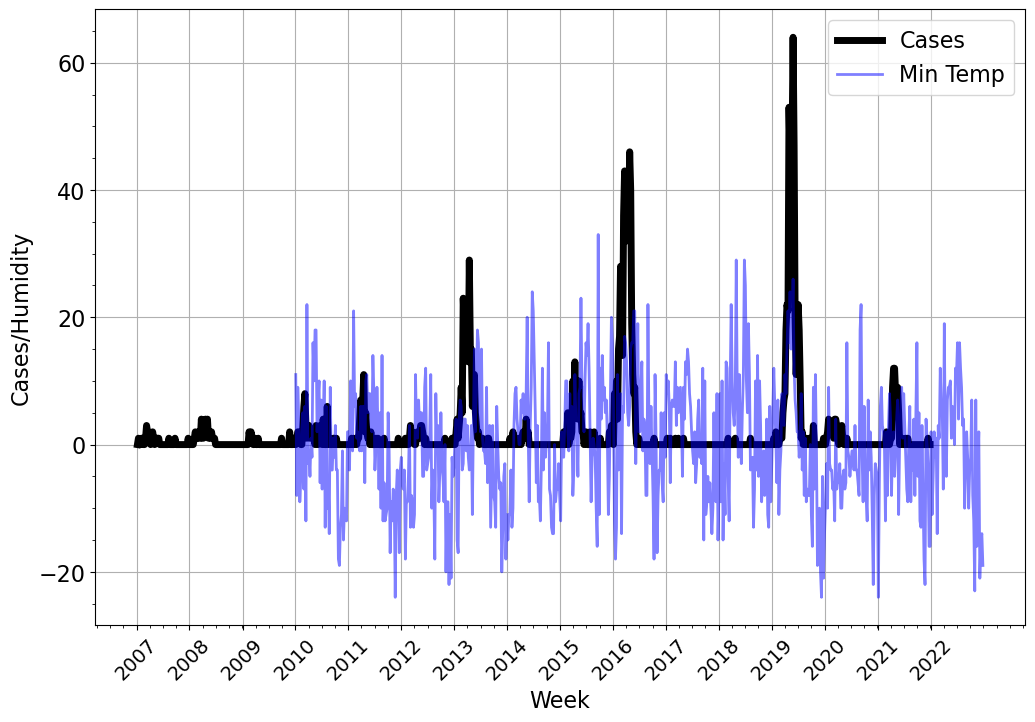

In [43]:
fig = plt.figure(figsize=(12,8))
plt.plot(df_pa['FIRST_DAY'],df_pa['CASES'], linewidth = 5, color = 'k', label = 'Cases')
plt.xlabel('Week',fontsize = 16)
plt.ylabel('Cases/Humidity',fontsize = 16)
plt.xticks(xticks_major, labels = xticks_labels, fontsize = 14, rotation = 45)
plt.yticks(fontsize = 16)
plt.minorticks_on()
plt.grid()
plt.plot(pa_climate['data'],pa_climate['umidade_rel_min_na_hora_ant'] - pa_climate['umidade_rel_min_na_hora_ant'].mean(), color = 'blue', linewidth = 2, alpha = 0.5, label = 'Min Temp')
plt.legend(fontsize = 16)
plt.show()
#plt.plot(pa_climate['data'],pa_climate['temperatura_maxima_na_hora_ant'] - pa_climate['temperatura_maxima_na_hora_ant'].mean(), color = 'blue', linewidth = 2, alpha = 0.5)

In [44]:
pa_climate['umidade_rel_max_na_hora_ant'].mean()

96.46902654867256

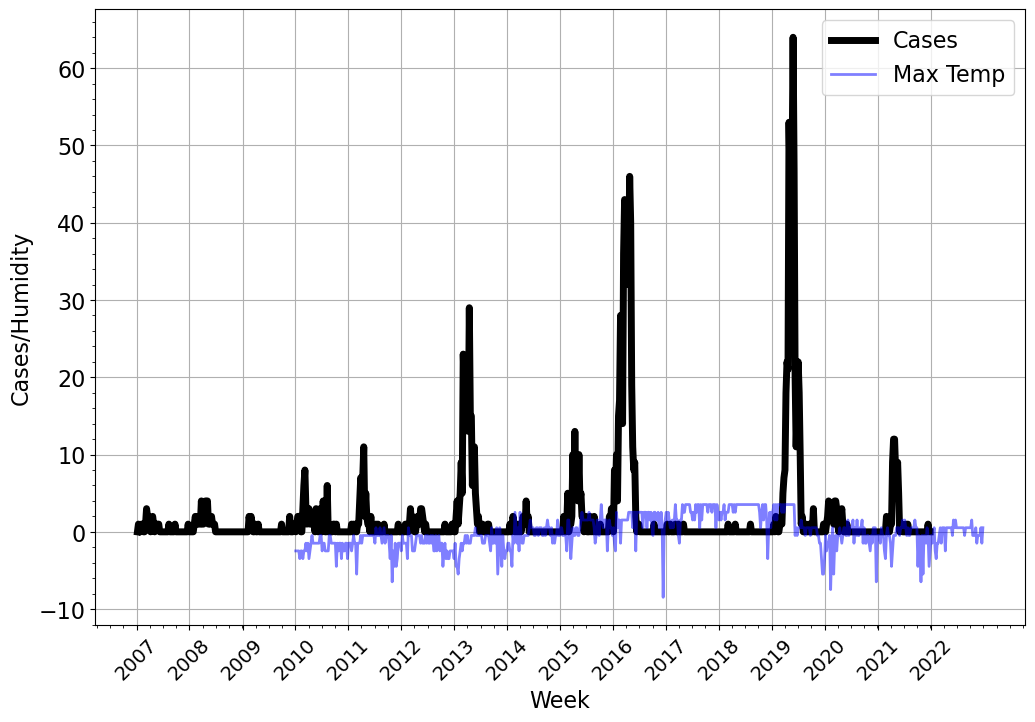

In [45]:
fig = plt.figure(figsize=(12,8))
plt.plot(df_pa['FIRST_DAY'],df_pa['CASES'], linewidth = 5, color = 'k', label = 'Cases')
plt.xlabel('Week',fontsize = 16)
plt.ylabel('Cases/Humidity',fontsize = 16)
plt.xticks(xticks_major, labels = xticks_labels, fontsize = 14, rotation = 45)
plt.yticks(fontsize = 16)
plt.minorticks_on()
plt.grid()
plt.plot(pa_climate['data'],pa_climate['umidade_rel_max_na_hora_ant'] - pa_climate['umidade_rel_max_na_hora_ant'].mean(), color = 'blue', linewidth = 2, alpha = 0.5, label = 'Max Temp')
plt.legend(fontsize = 16)
plt.show()

### Cases and Precipitation

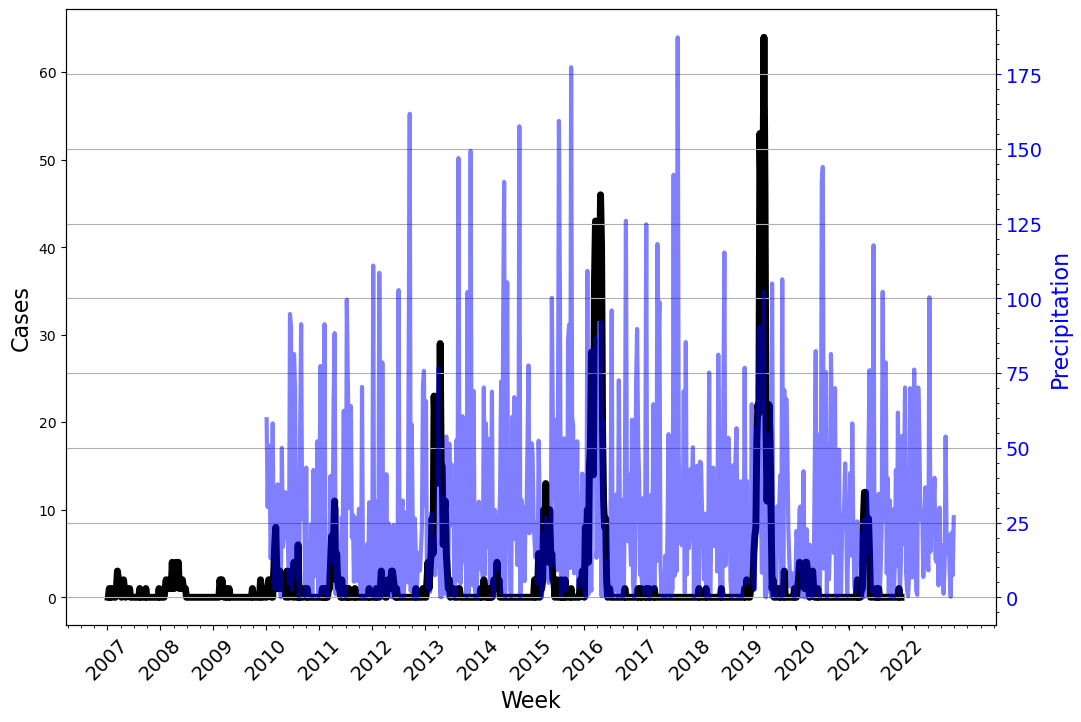

In [49]:
fig, ax1 = plt.subplots(figsize = (12,8))
ax1.plot(df_pa['FIRST_DAY'],df_pa['CASES'], linewidth = 5, color = 'k', label = 'Cases')
ax1.set_xlabel('Week',fontsize = 16)
ax1.set_ylabel('Cases',fontsize = 16)
ax1.set_xticks(xticks_major, labels = xticks_labels, fontsize = 14, rotation = 45)
ax2 = ax1.twinx() 
ax2.plot(pa_climate['data'],pa_climate['precipitacao_total_horario'], color = 'blue', linewidth = 3, alpha = 0.5)
ax2.set_ylabel('Precipitation', fontsize = 16, color = 'blue')
ax2.tick_params(labelsize = 14, colors = 'blue')
ax2.set_xticks(xticks_major)
ax2.set_xticklabels(labels = xticks_labels, fontsize=16)
ax2.minorticks_on()
plt.grid()
plt.show()

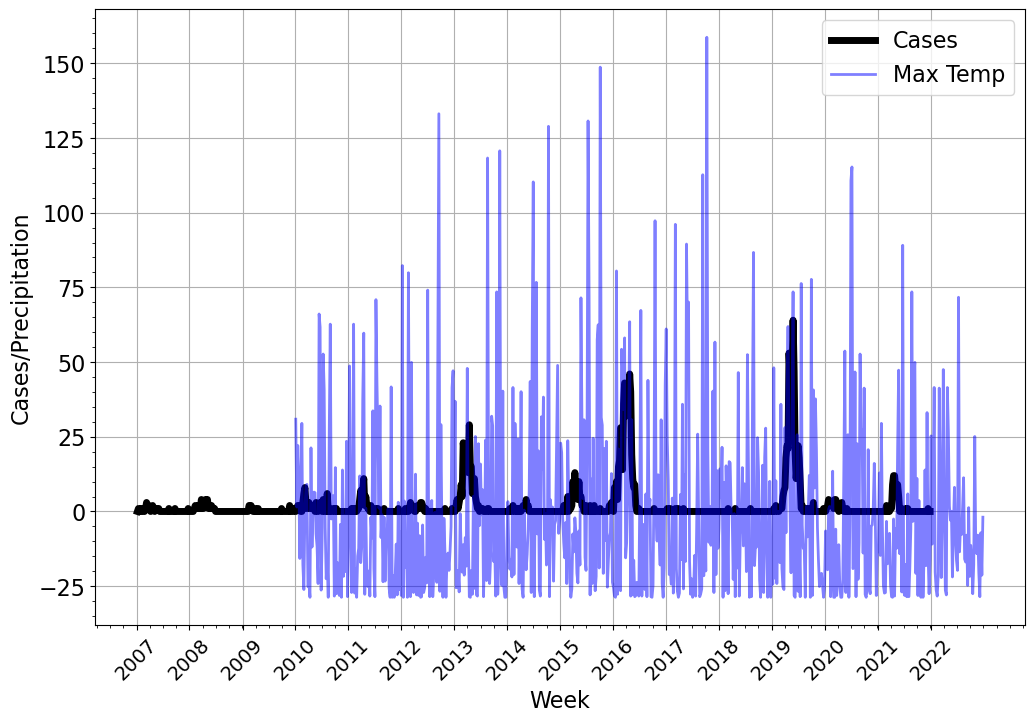

In [51]:
fig = plt.figure(figsize=(12,8))
plt.plot(df_pa['FIRST_DAY'],df_pa['CASES'], linewidth = 5, color = 'k', label = 'Cases')
plt.xlabel('Week',fontsize = 16)
plt.ylabel('Cases/Precipitation',fontsize = 16)
plt.xticks(xticks_major, labels = xticks_labels, fontsize = 14, rotation = 45)
plt.yticks(fontsize = 16)
plt.minorticks_on()
plt.grid()
plt.plot(pa_climate['data'],pa_climate['precipitacao_total_horario'] - pa_climate['precipitacao_total_horario'].mean(), color = 'blue', linewidth = 2, alpha = 0.5, label = 'Max Temp')
plt.legend(fontsize = 16)
plt.show()